# Ford GoBike System Data Flights Exploration
## by *Furawa*

## Data Wrangling

The Ford GoBike System Data Flights includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.  We will use the datasets of all the year 2018 which are divided in 12 separated datasets(1 dataset for each month of the year). 
We will download all the 12 datasets for the year 2018, gather them all together in one unique dataset, assess it and clean it if necessary. 
First of all let us import libraries useful for the process.  

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt  
import requests
import os
import zipfile
import re
import datetime

%matplotlib inline

Let us retrieve all the urls from the [Bay Wheels trip history data](https://s3.amazonaws.com/baywheels-data/index.html).

In [2]:
# Create an empty list to store the urls
baywheels_urls = []
# Create a for loop to retrieve the urls one by one, there are 12
for i in range(1,13):
    # Remove the 0 (after 2018) after the 9th file
    if i < 10:
        url = 'https://s3.amazonaws.com/baywheels-data/20180' + str(i) +'-fordgobike-tripdata.csv.zip'
    else:
        url = 'https://s3.amazonaws.com/baywheels-data/2018' + str(i) +'-fordgobike-tripdata.csv.zip'
    baywheels_urls.append(url)
baywheels_urls

['https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201812-fordgobike-tripdata.csv.zip']

Now we download all the zip files from the urls and store them in the created folder.  

In [3]:
zip_folder = 'baywheels_monthly_data_zip'   # folder to store the zip files
# Create zip_folder if it does not exist
if not os.path.exists(zip_folder):
    os.makedirs(zip_folder)
    
# Download each zip file from the urls with a for loop
for url in baywheels_urls:  
    response = requests.get(url)
    # Retrieve programmatically the name of the file which is the last part after /
    with open(os.path.join(zip_folder, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)
sorted(os.listdir(zip_folder))

['201801-fordgobike-tripdata.csv.zip',
 '201802-fordgobike-tripdata.csv.zip',
 '201803-fordgobike-tripdata.csv.zip',
 '201804-fordgobike-tripdata.csv.zip',
 '201805-fordgobike-tripdata.csv.zip',
 '201806-fordgobike-tripdata.csv.zip',
 '201807-fordgobike-tripdata.csv.zip',
 '201808-fordgobike-tripdata.csv.zip',
 '201809-fordgobike-tripdata.csv.zip',
 '201810-fordgobike-tripdata.csv.zip',
 '201811-fordgobike-tripdata.csv.zip',
 '201812-fordgobike-tripdata.csv.zip']

All the zip files are in the folder, we can proceed and unzip them.  

In [4]:
csv_folder = 'baywheels_monthly_data_csv'   # folder to store the unzip csv files
# Create csv_folder
if not os.path.exists(csv_folder):
    os.makedirs(csv_folder)
    
import glob
files = glob.glob(zip_folder+'/*.zip')
for file in files:
    with zipfile.ZipFile(file, 'r') as my_zip:
        my_zip.extractall(csv_folder)

In [5]:
sorted(os.listdir(csv_folder))

['201801-fordgobike-tripdata.csv',
 '201802-fordgobike-tripdata.csv',
 '201803-fordgobike-tripdata.csv',
 '201804-fordgobike-tripdata.csv',
 '201805-fordgobike-tripdata.csv',
 '201806-fordgobike-tripdata.csv',
 '201807-fordgobike-tripdata.csv',
 '201808-fordgobike-tripdata.csv',
 '201809-fordgobike-tripdata.csv',
 '201810-fordgobike-tripdata.csv',
 '201811-fordgobike-tripdata.csv',
 '201812-fordgobike-tripdata.csv']

In [6]:
# Read one file to see if everything is ok
test = pd.read_csv('baywheels_monthly_data_csv/201801-fordgobike-tripdata.csv')
test.shape
print(test.dtypes)
test.sample(6)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
60955,2124,2018-01-13 20:05:38.5410,2018-01-13 20:41:03.1690,245,Downtown Berkeley BART,37.870348,-122.267764,240,Haste St at Telegraph Ave,37.866043,-122.258804,3433,Subscriber,1996.0,Male,Yes
7590,689,2018-01-30 09:54:41.8700,2018-01-30 10:06:11.4760,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,1876,Subscriber,1987.0,Male,No
13798,260,2018-01-28 20:38:18.1180,2018-01-28 20:42:38.1440,235,Union St at 10th St,37.807239,-122.289370,235,Union St at 10th St,37.807239,-122.289370,2154,Subscriber,1969.0,Male,No
10895,778,2018-01-29 16:49:51.5480,2018-01-29 17:02:49.9890,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,27,Beale St at Harrison St,37.788059,-122.391865,1190,Subscriber,1980.0,Male,No
67629,571,2018-01-11 18:03:20.8080,2018-01-11 18:12:52.6710,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,75,Market St at Franklin St,37.773793,-122.421239,3346,Subscriber,1990.0,Male,No
43426,298,2018-01-19 14:48:06.7540,2018-01-19 14:53:05.4560,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,58,Market St at 10th St,37.776619,-122.417385,3685,Subscriber,1962.0,Male,No


Now that we have all the files we can read them and join them together in a unique dataframe.

In [116]:
# Select all the files in the csv_folder and store them in a list
list_files = glob.glob(csv_folder+'/*.csv')
# Read all the files of the list and put them all in one unique file
baywheels_data = pd.concat(map(pd.read_csv, list_files))

In [94]:
print(baywheels_data.shape)  
print(baywheels_data.dtypes)
baywheels_data.head()

(1863721, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No


All the files are in one unique dataframe `baywheels_data`, but there are many issues to fix before using the 
dataframe. Many columns does not have the correct data type(start_time, end_time, start_station_id,end_station_id,
user_type,member_birth_year,member_gender).

In [117]:
# Change the data type of start_time and end_time from object to date_time
baywheels_data.start_time = pd.to_datetime(baywheels_data.start_time, format = '%Y-%m-%d %H:%M:%S.%f')
baywheels_data.end_time = pd.to_datetime(baywheels_data.end_time, format = '%Y-%m-%d %H:%M:%S.%f')

In [118]:
# Assert that the changes are correct, no output means it is correct
assert baywheels_data.start_time.dtypes == '<datetime64[ns]'
assert baywheels_data.end_time.dtypes == '<datetime64[ns]'

In [119]:
# member_birth_year from float to int, we use Int64 instead of int64 to make it work
baywheels_data.member_birth_year = baywheels_data.member_birth_year.astype('Int64')           

In [120]:
# Check if the data type is correct, no output means it is correct 
assert baywheels_data.member_birth_year.dtypes == 'Int64'

In [121]:
# Change the data type of member_gender from string to category
baywheels_data.member_gender = baywheels_data.member_gender.fillna('Other') # Change the NaNs values to other
baywheels_data.member_gender = baywheels_data.member_gender.astype('category')

In [122]:
# Check if the data type is correct, no output means it is correct
assert baywheels_data.member_gender.dtypes == 'category'

In [123]:
# Change the user type from string to category  
baywheels_data.user_type = baywheels_data.user_type.astype('category')

In [124]:
# Check the changes, no output means it is correct
assert baywheels_data.user_type.dtypes == 'category'

In [125]:
baywheels_data.start_station_id = baywheels_data.start_station_id.fillna(0) # Replace the NaNs values with 0 
baywheels_data.end_station_id = baywheels_data.end_station_id.fillna(0)     # Replace the NaNs values with 0 
# Change data type of start_station_id and end_station_id from float to int
baywheels_data.start_station_id = baywheels_data.start_station_id.astype(int)
baywheels_data.end_station_id = baywheels_data.end_station_id.astype(int)

In [126]:
# Check the changes, no output means it is ok
assert baywheels_data.start_station_id.dtypes == 'int64'
assert baywheels_data.end_station_id.dtypes == 'int64'

In [127]:
# Some descriptives statistics for numeric variables
baywheels_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.189186e+02,3.776678e+01,-1.223492e+02,1.174266e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.005281e+02,1.057689e-01,1.654634e-01,1.005593e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,0.000000e+00,3.726331e+01,-1.224737e+02,0.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.000000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.800000e+01,3.778107e+01,-1.223974e+02,8.700000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.830000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


**Structure of the Dataset**  
There are 1863721 rows and 16 variables in the dataset(duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip), 9 of these are numerical variables.

**Main features of interest in the dataset**  
We are more interested in figuring out what factors or features affect the place a trip is taken and the duration of the trips.

**Features That will help support our investigation into our features of interest**  
Probably during the summer and holidays there will be more trip and for more time so the variables start_time and
end_time will probably have the major effect on the duration, we can also expect that subscriber takes more trips
than customers, we can expect that young people have many trips than old people.


## Univariate Exploration

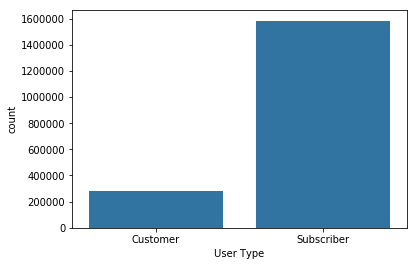

In [128]:
# Plot of the user type
base_color = sb.color_palette()[0]
sb.countplot(data = baywheels_data, x = 'user_type', color = base_color)
plt.xlabel('User Type');

As expected all over the year there are more Subscribers than customers.

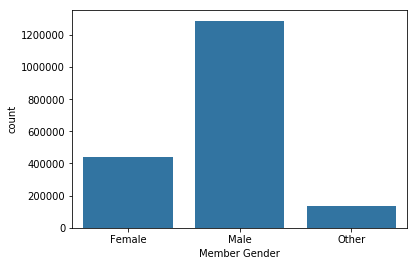

In [129]:
# Plot Member gender
sb.countplot(data = baywheels_data, x = 'member_gender', color = base_color)
plt.xlabel('Member Gender');

All over the year there are More men have trip compared to Women.

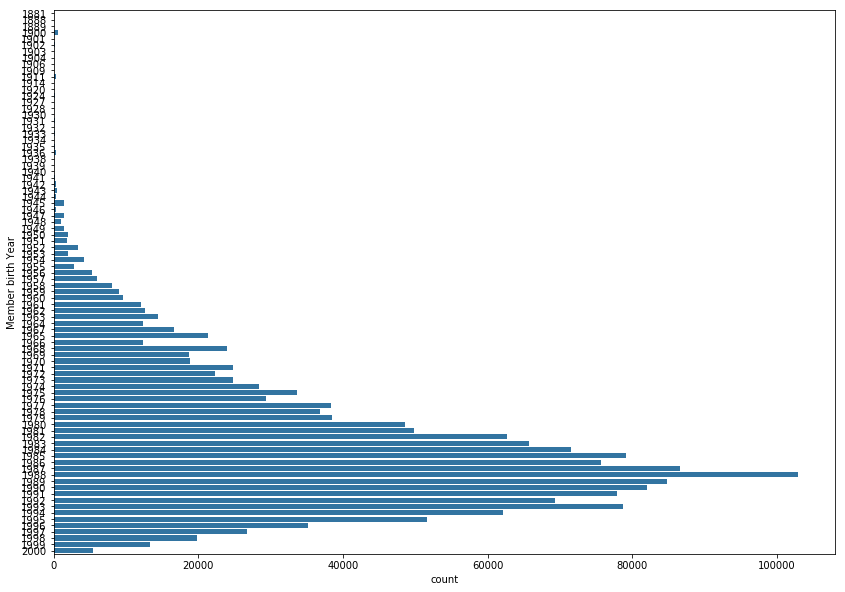

In [130]:
# Plot of the member_birth_year 
plt.figure(figsize = (14,10))
sb.countplot(data = baywheels_data, y = 'member_birth_year', color = base_color)
plt.ylabel('Member birth Year');

Looking at this plot we figure out that there are many outliers. Let us go deep.

In [140]:
# Check all the member birth year higher than 100 years 
wrong_birth_values = baywheels_data[baywheels_data.member_birth_year < 1918].member_birth_year
wrong_birth_values.value_counts().index

Index([], dtype='object')

All those values are probably errors, the oldest people in the world are around 116 years old and most of them live in Japan, in the other hand [the oldest](https://www.oldest.org/people/living-people-usa/) people in the USA are around 112 years old and are not in a state of driving a bicycle. We will consider in this analysis that all
the people with more than 100 years old are wrong values probably due to data entry and turn all these values to
NaNs.

In [133]:
# Turn all the member_birth_year wrong values to NaNs
for val in wrong_birth_values.value_counts().index:
    baywheels_data.member_birth_year[baywheels_data.member_birth_year == val] = np.nan

In [139]:
# Check if everything is ok
assert wrong_birth_values.value_counts().index.isin(baywheels_data.member_birth_year.tolist()).all() == False